In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, r2_score


In [2]:
df = pd.read_csv('./datasets/BTC-USD.csv')

In [11]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-14,780.005005,782.033997,776.838989,781.481018,781.481018,75979000
1,2016-12-15,780.070007,781.434998,777.802002,778.088013,778.088013,81580096
2,2016-12-16,778.963013,785.031982,778.963013,784.906982,784.906982,83608200
3,2016-12-17,785.166016,792.508972,784.864014,790.828979,790.828979,78989800
4,2016-12-18,791.007996,794.737000,788.026001,790.530029,790.530029,60524400
5,2016-12-19,790.692017,793.611023,790.320007,792.713989,792.713989,74886400
6,2016-12-20,792.247009,801.336975,791.497009,800.875977,800.875977,99629296
7,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000
8,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008
9,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000


In [69]:
df.tail(50)

,Date,Open,High,Low,Close,Adj Close,Volume
1412,2020-10-26,13031.201172,13225.297852,12822.382813,13075.248047,13075.248047,29461458313
1413,2020-10-27,13075.242188,13759.668945,13060.837891,13654.218750,13654.218750,33749878155
1414,2020-10-28,13654.214844,13837.695313,12932.250977,13271.285156,13271.285156,35867318894
1415,2020-10-29,13271.298828,13612.047852,12980.059570,13437.882813,13437.882813,56499499598
1416,2020-10-30,13437.874023,13651.516602,13136.198242,13546.522461,13546.522461,30581485200
1417,2020-10-31,13546.532227,14028.213867,13457.530273,13780.995117,13780.995117,30306464718
1418,2020-11-01,13780.995117,13862.033203,13628.377930,13737.109375,13737.109375,24453857900
1419,2020-11-02,13737.032227,13808.323242,13243.160156,13550.489258,13550.489258,30771455467
1420,2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,13950.300781,29869951617
1421,2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,14133.707031,35116364961


In [4]:
train = df.iloc[0:int(len(df)*0.8), :]
test = df.iloc[int(len(df)* 0.8): , :]

In [5]:
train.shape

(1169, 7)

In [6]:
x_train = []
y_train = []
for i in range(0, len(train)-3):
    x = train.iloc[i:(i+3), 4]
    y = train.iloc[i+3, 4]
    x_train.append(x)
    y_train.append(y)

In [9]:
x_train

[0    781.481018
 1    778.088013
 2    784.906982
 Name: Close, dtype: float64,
 1    778.088013
 2    784.906982
 3    790.828979
 Name: Close, dtype: float64,
 2    784.906982
 3    790.828979
 4    790.530029
 Name: Close, dtype: float64,
 3    790.828979
 4    790.530029
 5    792.713989
 Name: Close, dtype: float64,
 4    790.530029
 5    792.713989
 6    800.875977
 Name: Close, dtype: float64,
 5    792.713989
 6    800.875977
 7    834.281006
 Name: Close, dtype: float64,
 6    800.875977
 7    834.281006
 8    864.539978
 Name: Close, dtype: float64,
 7    834.281006
 8    864.539978
 9    921.984009
 Name: Close, dtype: float64,
 8     864.539978
 9     921.984009
 10    898.822021
 Name: Close, dtype: float64,
 9     921.984009
 10    898.822021
 11    896.182983
 Name: Close, dtype: float64,
 10    898.822021
 11    896.182983
 12    907.609985
 Name: Close, dtype: float64,
 11    896.182983
 12    907.609985
 13    933.197998
 Name: Close, dtype: float64,
 12    907.60998

In [10]:
y_train

[790.828979,
 790.530029,
 792.713989,
 800.875977,
 834.281006,
 864.539978,
 921.984009,
 898.822021,
 896.182983,
 907.609985,
 933.197998,
 975.921021,
 973.497009,
 961.237976,
 963.742981,
 998.325012,
 1021.75,
 1043.839966,
 1154.72998,
 1013.380005,
 902.200989,
 908.585022,
 911.198975,
 902.828003,
 907.679016,
 777.757019,
 804.833984,
 823.984009,
 818.411987,
 821.797974,
 831.533997,
 907.937988,
 886.617981,
 899.072998,
 895.026001,
 921.789001,
 924.672974,
 921.012024,
 892.687012,
 901.541992,
 917.585999,
 919.75,
 921.590027,
 919.495972,
 920.382019,
 970.403015,
 989.02301,
 1011.799988,
 1029.910034,
 1042.900024,
 1027.339966,
 1038.150024,
 1061.349976,
 1063.069946,
 994.382996,
 988.674011,
 1004.450012,
 999.18103,
 990.642029,
 1004.549988,
 1007.47998,
 1027.439941,
 1046.209961,
 1054.420044,
 1047.869995,
 1079.97998,
 1115.300049,
 1117.439941,
 1166.719971,
 1173.680054,
 1143.839966,
 1165.199951,
 1179.969971,
 1179.969971,
 1222.5,
 1251.01001,
 1

In [12]:
x_test = []
y_test = []
for i in range(0, len(test)-3):
    x = test.iloc[i:(i+3), 4]
    y = test.iloc[i+3, 4]
    x_test.append(x)
    y_test.append(y)

In [14]:
x_train

[0    781.481018
 1    778.088013
 2    784.906982
 Name: Close, dtype: float64,
 1    778.088013
 2    784.906982
 3    790.828979
 Name: Close, dtype: float64,
 2    784.906982
 3    790.828979
 4    790.530029
 Name: Close, dtype: float64,
 3    790.828979
 4    790.530029
 5    792.713989
 Name: Close, dtype: float64,
 4    790.530029
 5    792.713989
 6    800.875977
 Name: Close, dtype: float64,
 5    792.713989
 6    800.875977
 7    834.281006
 Name: Close, dtype: float64,
 6    800.875977
 7    834.281006
 8    864.539978
 Name: Close, dtype: float64,
 7    834.281006
 8    864.539978
 9    921.984009
 Name: Close, dtype: float64,
 8     864.539978
 9     921.984009
 10    898.822021
 Name: Close, dtype: float64,
 9     921.984009
 10    898.822021
 11    896.182983
 Name: Close, dtype: float64,
 10    898.822021
 11    896.182983
 12    907.609985
 Name: Close, dtype: float64,
 11    896.182983
 12    907.609985
 13    933.197998
 Name: Close, dtype: float64,
 12    907.60998

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))

In [24]:
x_train.shape

(1166, 1, 3)

In [72]:
x_train

array([[[ 781.481018,  778.088013,  784.906982]],

       [[ 778.088013,  784.906982,  790.828979]],

       [[ 784.906982,  790.828979,  790.530029]],

       ...,

       [[9608.475586, 9686.441406, 9663.181641]],

       [[9686.441406, 9663.181641, 9924.515625]],

       [[9663.181641, 9924.515625, 9650.174805]]])

In [51]:
model = Sequential()

In [52]:
model.add(LSTM(100, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))

c:\Users\Ace\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.add(LSTM(64, activation='relu'))

In [54]:
pd.DataFrame(y_train)

,0
0,790.828979
1,790.530029
2,792.713989
3,800.875977
4,834.281006
...,...
1161,9686.441406
1162,9663.181641
1163,9924.515625
1164,9650.174805


In [55]:
model.add(Dense(1, ))

In [56]:
model.compile(loss='mse', optimizer='adam')

In [57]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2, shuffle=False, verbose=2)

Epoch 1/30
15/15 - 3s - 217ms/step - loss: 43003136.0000 - val_loss: 74916552.0000
Epoch 2/30
15/15 - 0s - 10ms/step - loss: 38238332.0000 - val_loss: 66333096.0000
Epoch 3/30
15/15 - 0s - 24ms/step - loss: 31714720.0000 - val_loss: 50090648.0000
Epoch 4/30
15/15 - 0s - 12ms/step - loss: 21950348.0000 - val_loss: 29446718.0000
Epoch 5/30
15/15 - 0s - 14ms/step - loss: 10668031.0000 - val_loss: 9815642.0000
Epoch 6/30
15/15 - 0s - 19ms/step - loss: 2381471.7500 - val_loss: 634375.1875
Epoch 7/30
15/15 - 0s - 20ms/step - loss: 274484.7812 - val_loss: 383728.3125
Epoch 8/30
15/15 - 0s - 16ms/step - loss: 342674.0625 - val_loss: 191024.2344
Epoch 9/30
15/15 - 0s - 13ms/step - loss: 246262.3906 - val_loss: 153811.2188
Epoch 10/30
15/15 - 0s - 10ms/step - loss: 246240.7344 - val_loss: 152695.4844
Epoch 11/30
15/15 - 0s - 11ms/step - loss: 244160.9375 - val_loss: 153958.6875
Epoch 12/30
15/15 - 0s - 10ms/step - loss: 244543.3125 - val_loss: 153695.3906
Epoch 13/30
15/15 - 0s - 11ms/step - los

In [58]:
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [59]:
y_pred = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


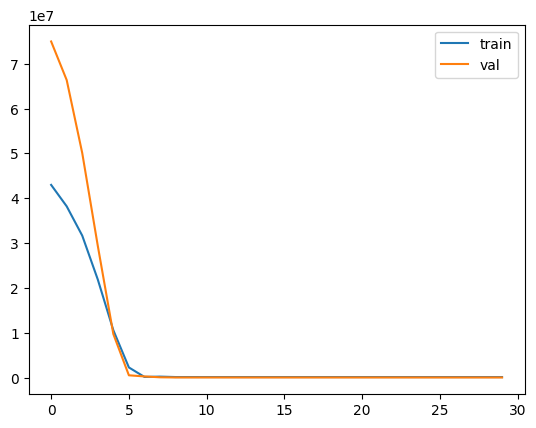

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])

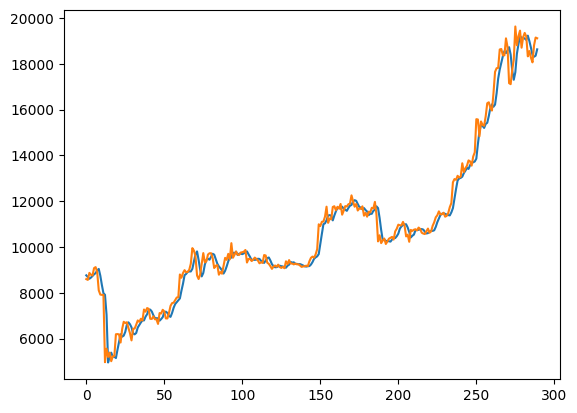

In [64]:
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='test')

In [66]:
r2_score(y_pred, y_test)

0.9797678283748097